In [1]:
import nltk

In [2]:
doc = open('Data/smsspamcollection/SMSSpamCollection')


In [3]:
mensajes= [line.rstrip()for line in doc]
## recorre linea a linea 
# rstrip remove espacio a la derecha

In [75]:
mensajes[0]
## tipo de mensaje, no es spam (ham), /t es tabulacion

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [76]:
print(len(mensajes))

5574


In [77]:
for mensaje in enumerate(mensajes[:5]):
    print(mensaje)

(0, 'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')
(1, 'ham\tOk lar... Joking wif u oni...')
(2, "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")
(3, 'ham\tU dun say so early hor... U c already then say...')
(4, "ham\tNah I don't think he goes to usf, he lives around here though")


In [78]:
import pandas as pd
mensajesdf = pd.read_csv('Data/smsspamcollection/SMSSpamCollection', '\t', names=['etiqueta','mensaje'])


/home/javier/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [79]:
mensajesdf.head()

,etiqueta,mensaje
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
mensajesdf['longitud']=mensajesdf['mensaje'].apply(len)
mensajesdf.head()

,etiqueta,mensaje,longitud
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns


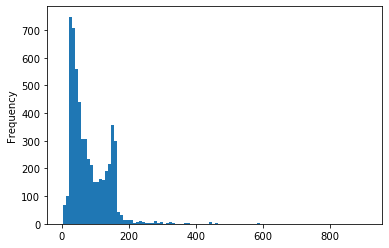

In [82]:
mensajesdf['longitud'].plot.hist(bins=100)

In [83]:
mensajesdf['longitud'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: longitud, dtype: float64

In [84]:
mensajesdf[mensajesdf['longitud']==2]['mensaje']

1925    Ok
3051    Ok
4498    Ok
5357    Ok
Name: mensaje, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9be69ccee0>,
      dtype=object)

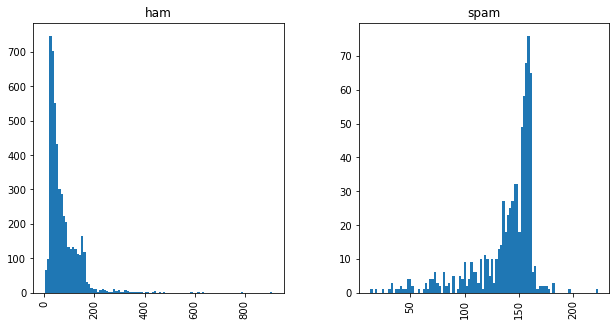

In [85]:
mensajesdf.hist(column='longitud', by='etiqueta', bins=100, figsize=(10,5))

# preproceso

In [86]:
import string

In [87]:
cadena = 'este es un mensaje de prueba!; / debo limpiar la data'

In [88]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [89]:
sinpuntuacion=[caracter for caracter in cadena if caracter not in string.punctuation]
# list comprenhention devolver carater si cumple el if, el primer argumento es caracter lo que debe devolver

In [90]:
# la anterior list comprenhention se haria así de forma larga
# for caracter in cadena:
#     if caracter not in string.punctuation:
#         sinpuntuacion.append(caracter)

In [91]:
print(sinpuntuacion)

['e', 's', 't', 'e', ' ', 'e', 's', ' ', 'u', 'n', ' ', 'm', 'e', 'n', 's', 'a', 'j', 'e', ' ', 'd', 'e', ' ', 'p', 'r', 'u', 'e', 'b', 'a', ' ', ' ', 'd', 'e', 'b', 'o', ' ', 'l', 'i', 'm', 'p', 'i', 'a', 'r', ' ', 'l', 'a', ' ', 'd', 'a', 't', 'a']


In [92]:
sinpuntuacion=''.join(sinpuntuacion) # '', lo interpreta como cadena
sinpuntuacion

'este es un mensaje de prueba  debo limpiar la data'

In [93]:
sinpuntuacion=str(sinpuntuacion)

In [94]:
# eliminiar stopword
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/javier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [95]:
palabras=sinpuntuacion.split()
print(palabras)

['este', 'es', 'un', 'mensaje', 'de', 'prueba', 'debo', 'limpiar', 'la', 'data']


In [98]:
cadena_limpia = [palabra for palabra in palabras if palabra.lower() not in stopwords.words('spanish')]
cadena_limpia

['mensaje', 'prueba', 'debo', 'limpiar', 'data']

## usamos los conceptos anteriores para realizar una funcion para arreglo de la base de datos

In [109]:
def procesar_texto(cadena):
  #paso 1 eliminar caracteres especiales
  sinpuntuacion = [caracter for caracter in cadena if caracter not in string.punctuation]
  #paso 2 unir la cadena
  sinpuntuacion = ''.join(sinpuntuacion)
  #paso 3 trasformar la cadena a lista
  palabras = sinpuntuacion.split()
  #paso 4 eliminar stopwords
  cadena_limpia = [palabra for palabra in palabras if palabra.lower() not in stopwords.words('english')]
  return cadena_limpia

In [105]:
procesar_texto('el mas de todos los males es el que permite que siendo algo malo lo permite')

['mas', 'males', 'permite', 'siendo', 'malo', 'permite']

In [110]:
mensajesdf.head(5)


,etiqueta,mensaje,longitud
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [113]:
mensajesdf['mensaje'].head(5).apply(procesar_texto)


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: mensaje, dtype: object

In [114]:
mensajesdf.head()

,etiqueta,mensaje,longitud
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [130]:
# vectorizar
from sklearn.feature_extraction.text import CountVectorizer


In [117]:
transformador= CountVectorizer(analyzer=procesar_texto).fit(mensajesdf['mensaje'])

In [ ]:
print(transformador.vocabulary_)
## se tienen las palabras importante con un id., es un diccionario

In [132]:
mensaje3= mensajesdf['mensaje'][3]
mensaje3

'U dun say so early hor... U c already then say...'

In [129]:
mensaje3_transformado=transformador.transform([mensaje3])
print(mensaje3_transformado)
## id de la palabra 

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [131]:
transformador.get_feature_names()[4068]

'U'

## modelo de clasificacion

In [133]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [135]:
mensaje_train, mensaje_test, etiqueta_train, etiqueta_test= train_test_split(mensajesdf['mensaje'],mensajesdf['etiqueta'],test_size=0.3)

In [ ]:
# pipline = Pipeline([('vectorizar',CountVectorizer(analyzer=procesar_texto)), 'transformar'])
# pipeline = Pipeline([('vectorizar', CountVectorizer(analyzer=procesar_texto)),
#                     ('trasformar', TfidfTransformer()),
#                     ('clasificar', RandomForestClassifier())]

            

In [137]:
pipeline = Pipeline([('vectorizar', CountVectorizer(analyzer=procesar_texto)),
                     ('trasformar', TfidfTransformer()),
                     ('clasificar', RandomForestClassifier())])


In [138]:
pipeline.fit(mensaje_train, etiqueta_train)

Pipeline(steps=[('vectorizar',
                 CountVectorizer(analyzer=<function procesar_texto at 0x7f9b82c20a60>)),
                ('trasformar', TfidfTransformer()),
                ('clasificar', RandomForestClassifier())])

In [141]:
predicciones=pipeline.predict(mensaje_test)
predicciones

array(['ham', 'ham', 'spam', ..., 'spam', 'ham', 'ham'], dtype=object)

In [142]:
print(classification_report(etiqueta_test,predicciones))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1446
        spam       0.99      0.84      0.91       226

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

